In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
data = pd.read_csv("./CLAS12_hadronic_and_partonic.csv")

# x and q2 2D binning
x_q2_bins = np.array([
    [0.12,1.62],#0
    [0.21,1.77],#1
    [0.16,2.19],#2
    [0.26,2.22],#3
    [0.2,2.73],#4
    [0.32,2.82],#5
    [0.29,3.76],#6
    [0.39,3.8],#7
    [0.46,3.8],#8
    [0.398,5.1],#9
    [0.5,5.1], #10
    [0.42,5.9], #11
    [0.59,7.5] #12
])
x_q2_edges = np.array([
    [[0,0.182],[0,4.5]], # 0
    [[0.182,1],[0,4.5]], #1
    [[0,0.23],[4.5,5.6]], #2
    [[0.23,1],[4.5,5.6]], #3
    [[0,0.29],[5.6,7.6]], #4
    [[0.29,1],[5.6,7.6]], #5
    [[0,0.4],[7.6,25]], #6
    [[0.4,0.476],[7.6,9]], #7
    [[0.476,1],[7.6,9]], #8
    [[0.4,0.48],[9,11.5]], #9
    [[0.48,1],[9,11.5]], #10
    [[0.4,0.52],[11.5,25]], #11
    [[0.52,1],[11.5,25]], #12
])

# Bin centers
z_bins_even = np.arange(0.15,0.9,0.1)
pt_bins_even = np.arange(0.05,1.1,0.1)
T_t_bins_even = np.arange(0.175,3.6,0.35)

z_bin_edges = np.arange(0.15,0.9,0.1)
z_bin_edges -= 0.05
z_bin_edges = np.append(z_bin_edges, z_bin_edges[-1] + 0.1)

pt_bin_edges = np.arange(0.05,1.1,0.1)
pt_bin_edges -= 0.05
pt_bin_edges = np.append(pt_bin_edges, pt_bin_edges[-1] + 0.1)

T_t_bin_edges = np.arange(0.175,3.6,0.35)
T_t_bin_edges -= 0.175
T_t_bin_edges = np.append(T_t_bin_edges, T_t_bin_edges[-1] + 0.15)


#loop over 2d bins
df = {
    'x' : [],
    'Q' : [],
    'z' : [],
    'T_t' : [],
    'R2' : []
}
size = 100

for i in range(len(x_q2_edges)):
    curr_x_q2_bin_centers = x_q2_bins[i]
    curr_x_center = curr_x_q2_bin_centers[0]
    curr_q2_center = curr_x_q2_bin_centers[1]
    
    curr_x_q2_bins = x_q2_edges[i]
    curr_x_edges = curr_x_q2_bins[0]
    curr_q2_edges = curr_x_q2_bins[1]
    curr_q_edges = np.sqrt(curr_q2_edges)
    for j in range(len(z_bins_even)):
        curr_z_edges = np.array([z_bin_edges[j],z_bin_edges[j+1]])
        curr_z_center = z_bins_even[j]
        for k in range(len(T_t_bins_even)):
            curr_T_t_center = T_t_bins_even[k]
            curr_T_t_edges = np.array([T_t_bin_edges[k],T_t_bin_edges[k+1]])
            filtered_data = data[((data['Q'] > curr_q_edges[0]) & (data['Q'] < curr_q_edges[1])) & 
                                 ((data['x'] > curr_x_edges[0]) & (data['x'] < curr_x_edges[1])) &
                                 ((data['z'] > curr_z_edges[0]) & (data['z'] < curr_z_edges[1])) &
                                 ((data['T_t'] > curr_T_t_edges[0]) & (data['T_t'] < curr_T_t_edges[1]))
                                ]
            if(len(filtered_data) < size * 2):
                continue
#             samples = data.sample(n = size)
            samples = filtered_data.sample(n = size)
            
            # Do some calculations:
            samples['R2'] = (samples['M_ki'] ** 2 ) / (samples['Q'] ** 2) #assuming kf = ki + q
            df['R2'].append(samples.loc[:,'R2'].mean())
            df['x'].append(curr_x_center)
            df['Q'].append(np.sqrt(curr_q2_center))
            df['z'].append(curr_z_center)
            df['T_t'].append(curr_T_t_center)
R2_df = pd.DataFrame(df)
# R2_df.to_csv("R2_df.csv")

[Text(0, 0.5, 'Counts')]

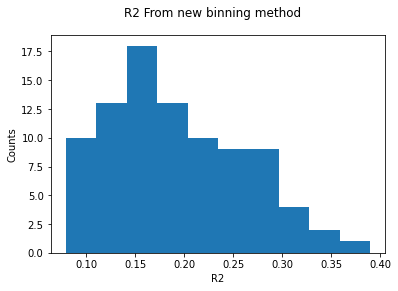

In [15]:
fig, axs = plot.subplots(1,1)
fig.suptitle("R2 From new binning method")
axs.hist(R2_df['R2'])
axs.set(xlabel = "R2")
axs.set(ylabel = "Counts")